# Trends over time 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import time
import datetime
import os 
from tqdm import tqdm

In [2]:
place = "Linköping"
job_title = "Software Developer"
#data_dir = './results/pi-data/results/'
data_dir = './results/'

In [3]:
count = 0
for file in os.listdir(data_dir):
    if file.endswith('.csv') and place in file:
        #print(f'Processing file: {file}')
        count += 1
print(f'Total number of files for {place}: {count}')

Total number of files for Linköping: 12


In [4]:
all_jobs_dfs = []
for file in tqdm(os.listdir(data_dir)):
    if file.endswith('.csv') and place in file and file.startswith('jobs_'):
        date = file.split("_")[-1].replace('.csv','')
        df = pd.read_csv(os.path.join(data_dir, file))
        df['date'] = date
        all_jobs_dfs.append(df)
print(f'Total number of dataframes collected: {len(all_jobs_dfs)}')

100%|██████████| 31/31 [00:00<00:00, 4041.76it/s]

Total number of dataframes collected: 3


In [5]:
all_jobs_dfs[-1].head()

,job_title,company_name,location,time_posted,num_applicants,date
0,Embedded Software Developer,Softube AB,Linköping,3 weeks ago,0,2025-12-09
1,Developer: PC-plattformar & MCU-utveckling,Saab,Linköping,1 week ago,0,2025-12-09
2,System Developer to Linköping!,TMC Sweden,Linköping,3 weeks ago,33,2025-12-09
3,"Software Developer, Backend - Sectra Medical",Sectra,Linköping,1 week ago,0,2025-12-09
4,Software Engineer,Voyado,Norrköping,3 days ago,66,2025-12-09


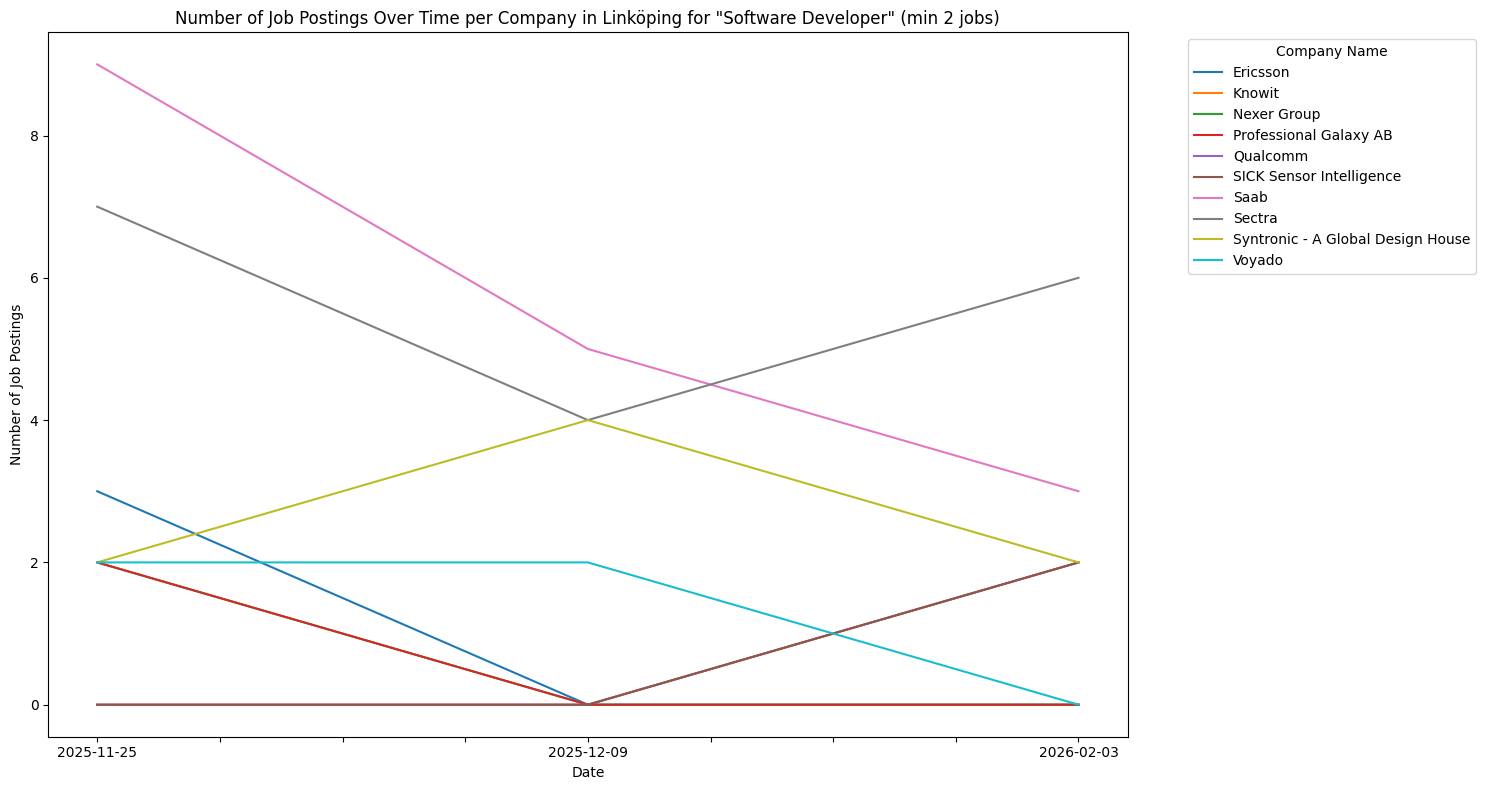

In [6]:
minimum_number_of_jobs = 2
jobs_over_time = pd.concat(all_jobs_dfs)
jobs_over_time_grouped = jobs_over_time.groupby(['date', 'company_name']).size().reset_index(name='job_count')
jobs_over_time_grouped = jobs_over_time_grouped[jobs_over_time_grouped['job_count'] >= minimum_number_of_jobs]
jobs_over_time_pivot = jobs_over_time_grouped.pivot(index='date', columns='company_name', values='job_count').fillna(0)
jobs_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Job Postings Over Time per Company in {place} for "{job_title}" (min {minimum_number_of_jobs} jobs)')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [7]:
jobs_over_time.company_name.unique()

array(['Qvantum Sverige', 'Sectra', 'Combine', 'Voyado', 'Together Tech',
       'Väderstad AB', 'Knowit', 'XLENT', 'Astek', 'CGI',
       'Syntronic - A Global Design House', 'Qualcomm', 'INUstyr AB',
       'Skill', 'FOI', 'Saab', 'Professional Galaxy AB',
       'Nexer Tech Talent', 'Axis Communications',
       'SICK Sensor Intelligence', 'HiQ', 'Deploja', 'Softube AB',
       'Rasulson Consulting AB', 'Nexer Group', 'TMC Sweden', 'Ericsson',
       'Stadium', 'Prevas AB', 'Beyond Gravity', 'RemaSawco',
       'ALTEN Sweden', 'Combitech Sverige', 'NDP IT AB', 'Friday'],
      dtype=object)

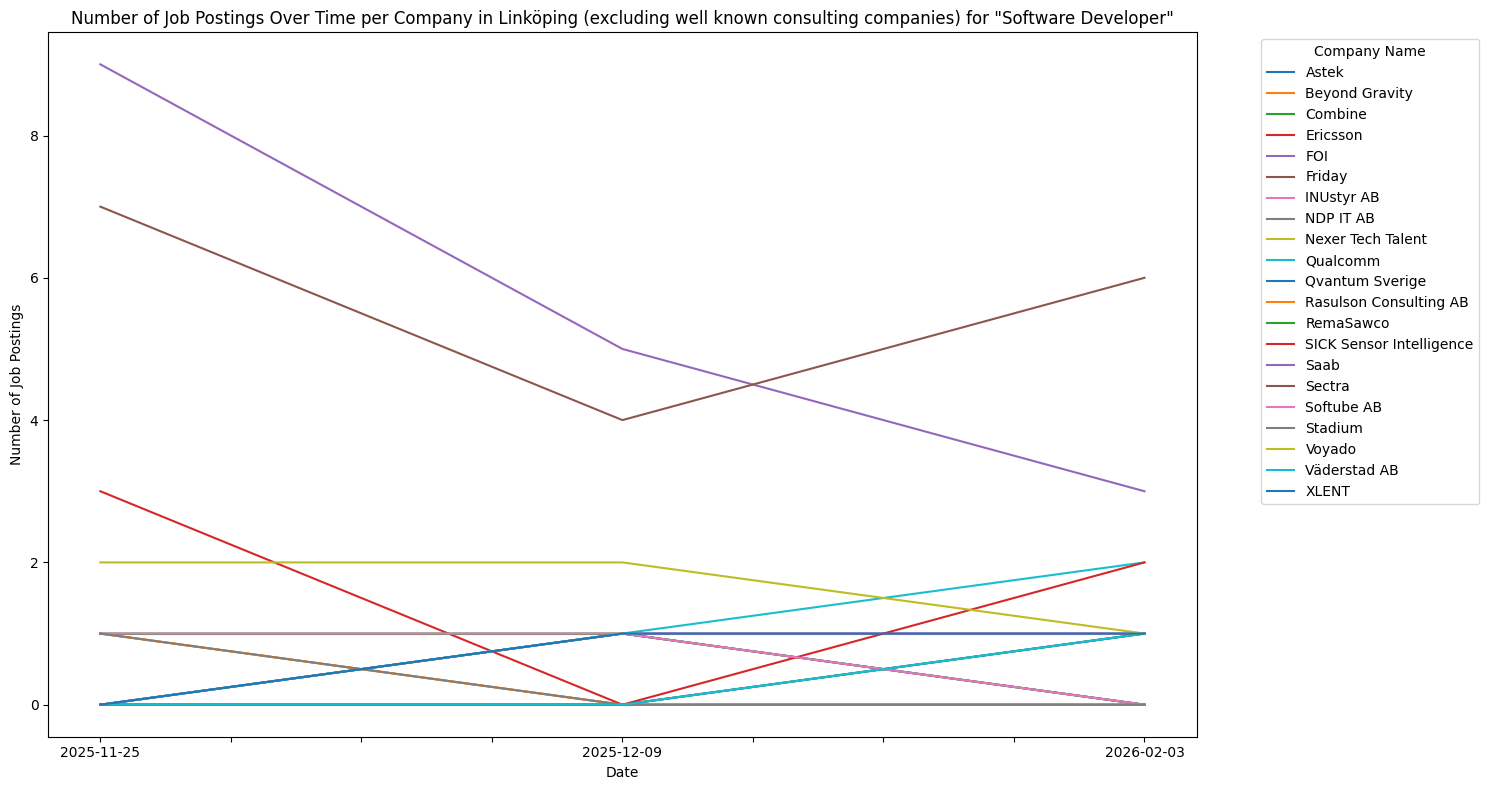

In [8]:
known_consulting_companies = ['Professional Galaxy AB', 'Avaron AB',
        'Formulate IT', 'Knowit','Axis Communications',
        'Prevas AB', 'CGI', 'Experis Sweden', 
        'ALTEN Sweden', 'Syntronic - A Global Design House',
        'Combitech Sverige', 'Framtiden AB', 'HiQ', 'TMC Sweden',
        'Deploja', 'Skill', 'Elvis Eckardt Recruitment',
        'Ictech', 'Nexer Group', 'Together Tech']

minimum_number_of_jobs = 1
jobs_over_time = pd.concat(all_jobs_dfs)
jobs_over_time_grouped = jobs_over_time.groupby(['date', 'company_name']).size().reset_index(name='job_count')
jobs_over_time_grouped = jobs_over_time_grouped[~jobs_over_time_grouped["company_name"].isin(known_consulting_companies)]
jobs_over_time_grouped = jobs_over_time_grouped[jobs_over_time_grouped['job_count'] >= minimum_number_of_jobs]
jobs_over_time_grouped = jobs_over_time_grouped.fillna(0)
jobs_over_time_pivot = jobs_over_time_grouped.pivot(index='date', columns='company_name', values='job_count').fillna(0)
jobs_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Job Postings Over Time per Company in {place} (excluding well known consulting companies) for "{job_title}"')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

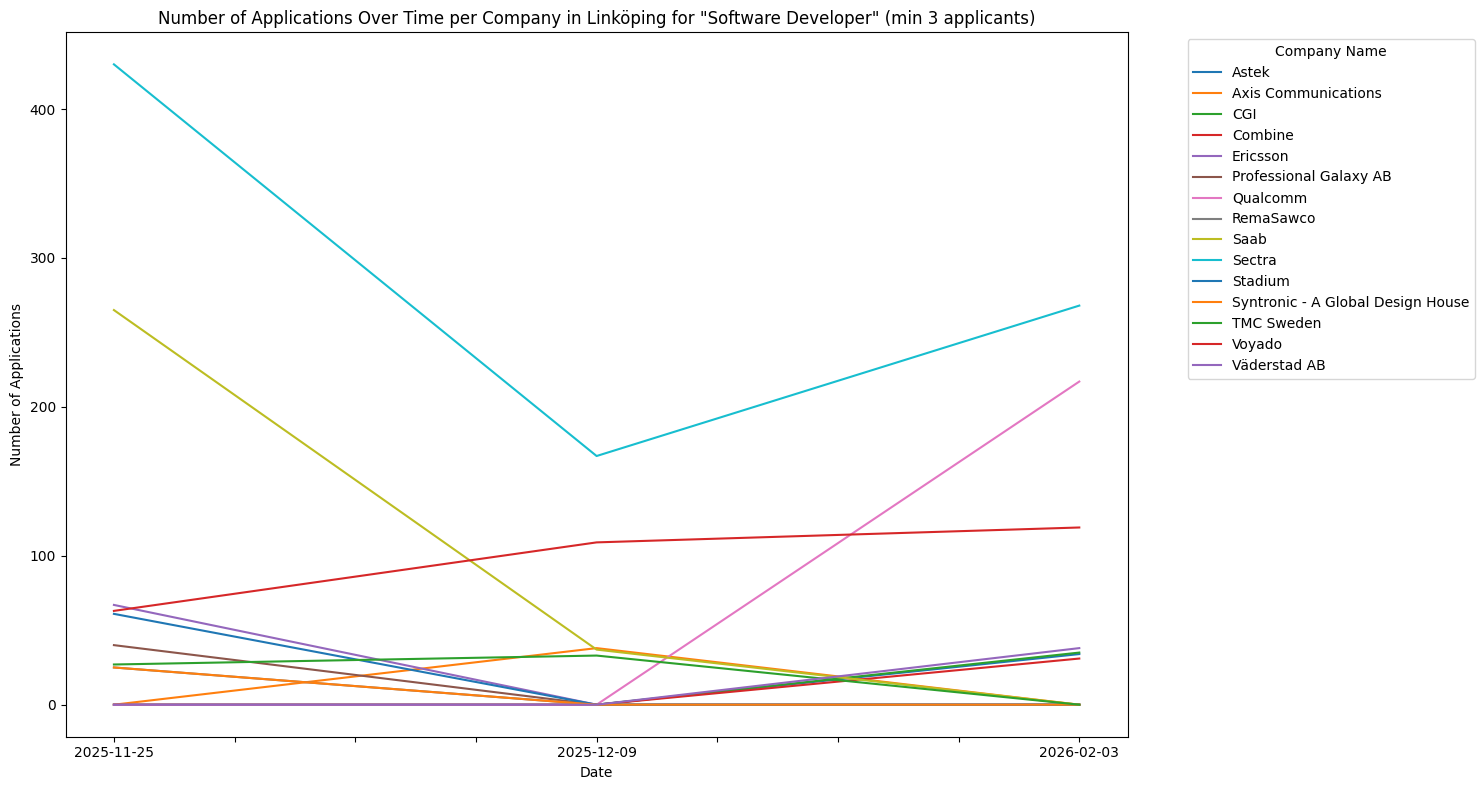

In [9]:
minimum_number_of_application = 3
applications_over_time = pd.concat(all_jobs_dfs)
applications_over_time.groupby(['date', 'company_name'])['num_applicants'].sum().reset_index(name='total_applications')
applications_over_time_grouped = applications_over_time.groupby(['date', 'company_name'])['num_applicants'].sum().reset_index(name='total_applications')
applications_over_time_grouped = applications_over_time_grouped[applications_over_time_grouped['total_applications'] >= minimum_number_of_application]
applications_over_time_pivot = applications_over_time_grouped.pivot(index='date', columns='company_name', values='total_applications').fillna(0)
applications_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Applications Over Time per Company in {place} for "{job_title}" (min {minimum_number_of_application} applicants)')
plt.xlabel('Date')
plt.ylabel('Number of Applications')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 

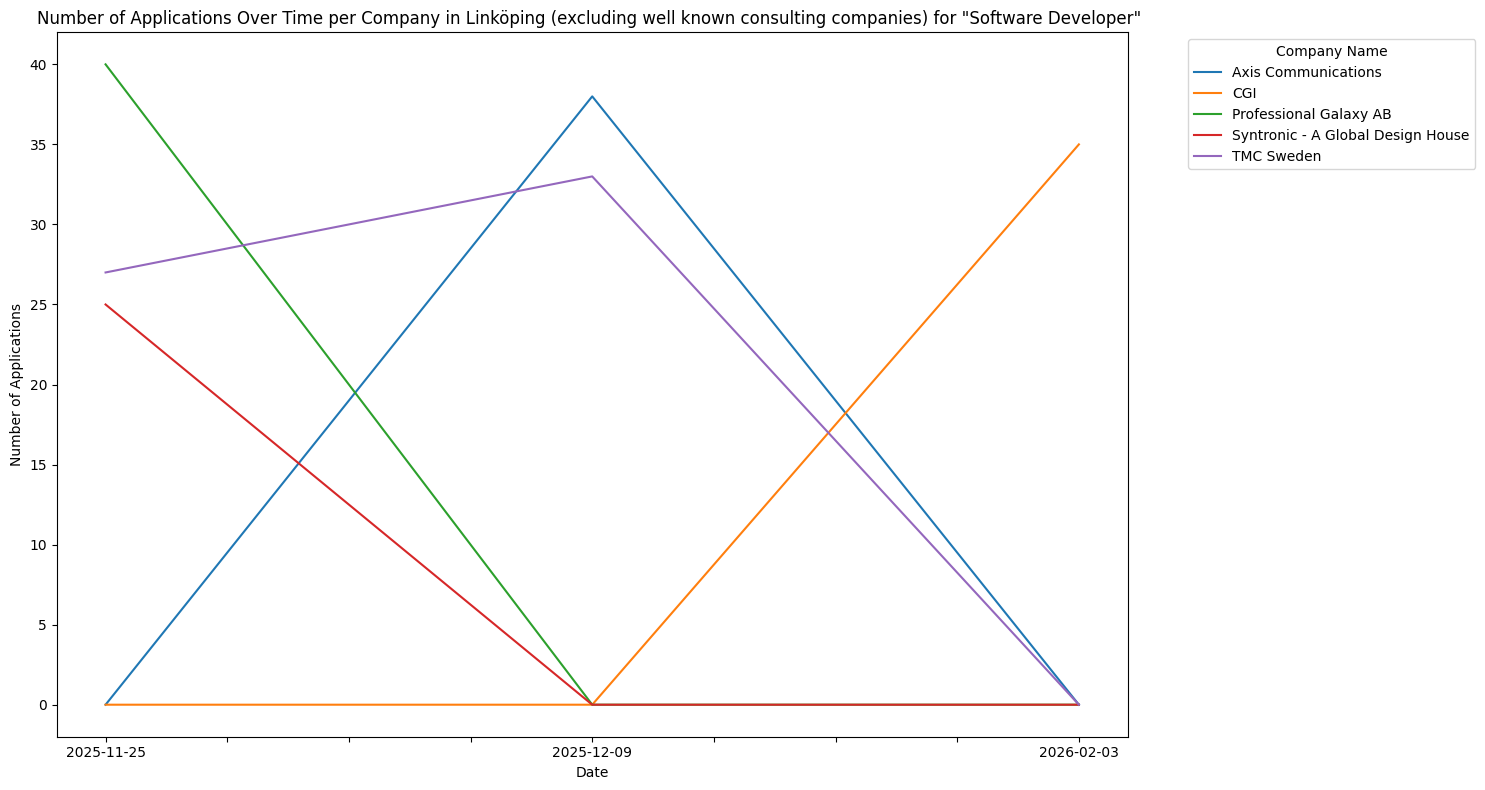

In [11]:
minimum_number_of_application = 1
applications_over_time = pd.concat(all_jobs_dfs)
applications_over_time.groupby(['date', 'company_name'])['num_applicants'].sum().reset_index(name='total_applications')
applications_over_time_grouped = applications_over_time.groupby(['date', 'company_name'])['num_applicants'].sum().reset_index(name='total_applications')
applications_over_time_grouped = applications_over_time_grouped[applications_over_time_grouped["company_name"].isin(known_consulting_companies)]
applications_over_time_grouped = applications_over_time_grouped[applications_over_time_grouped['total_applications'] >= minimum_number_of_application]
applications_over_time_pivot = applications_over_time_grouped.pivot(index='date', columns='company_name', values='total_applications').fillna(0)
applications_over_time_pivot.plot(kind='line', figsize=(15, 8))
plt.title(f'Number of Applications Over Time per Company in {place} (excluding well known consulting companies) for "{job_title}" ')
plt.xlabel('Date')
plt.ylabel('Number of Applications')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show() 